In [5]:
import pandas as pd
import numpy

df = pd.read_csv('C:/Users/kaczm/Downloads/Dataset.csv')

In [6]:
# let's take a look at the data first

df.head(5)

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [7]:
df.shape

(567291, 17)

In [9]:
df.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


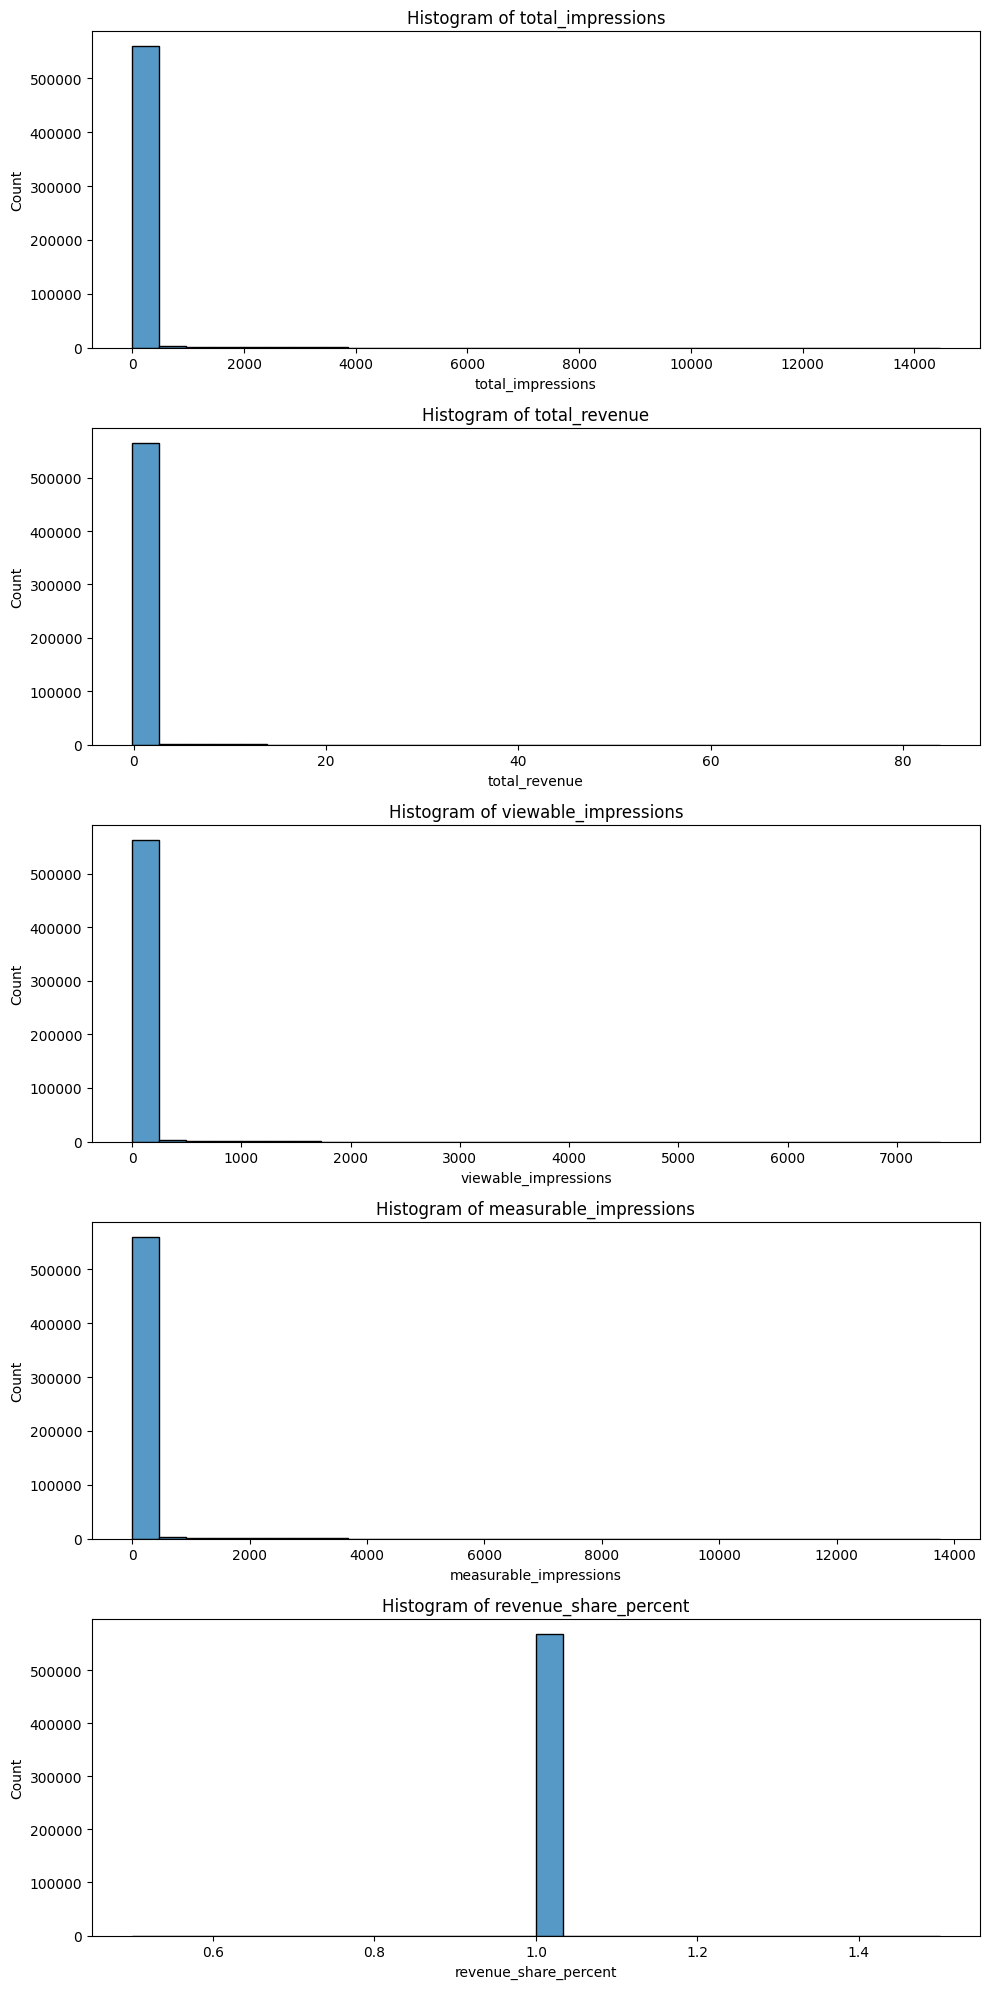

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df):
    # Select the last 5 columns
    columns = df.columns[-5:]

    # Create a figure with 5 subplots, arranged vertically
    fig, axs = plt.subplots(5, 1, figsize=(10, 20))

    # Iterate over the columns and corresponding subplot axes
    for col, ax in zip(columns, axs):
        # Create a histogram for this column
        sns.histplot(df[col], ax=ax, kde=False, bins=30)
        
        # Set the title for this subplot
        ax.set_title(f"Histogram of {col}")
    
    # Automatically adjust the subplot layout
    plt.tight_layout()

    # Display the figure
    plt.show()

plot_histograms(df)

In [12]:
# check for NAs

df.isna().sum()

date                       0
site_id                    0
ad_type_id                 0
geo_id                     0
device_category_id         0
advertiser_id              0
order_id                   0
line_item_type_id          0
os_id                      0
integration_type_id        0
monetization_channel_id    0
ad_unit_id                 0
total_impressions          0
total_revenue              0
viewable_impressions       0
measurable_impressions     0
revenue_share_percent      0
dtype: int64

In [19]:
# check unique values in some of the columns

def check_unique(df, columns):
    for column in columns:
        print(df[column].unique())

check_unique(df, ['integration_type_id', 'monetization_channel_id','ad_unit_id'] )

[1]
[ 4 19  1  2 21]
[5174 5138 5144 5169 5177 5173 5172 5180 5179 5178 5176 5171 5170 5175
 5168 5121 5157 5162 5156 5152 5158 5164 5163 5153 5159 5155 5161 5154
 5160 5167 5107 5142 5145 5148 5139 5147 5140 5141 5146 5143 5137 5151
 5128 5123 5134 5133 5131 5124 5132 5125 5127 5130 5129 5122 5126 5136
 5442 5443 5114 5108 5117 5119 5120 5115 5118 5109 5116 5113 5110 5112
 5111 5106 5103 5104 5183 5096 5105 5097 5102 5099 5101 5098 5100 5095
 5089 5088 5084 5092 5093 5090 5080 5091 5083 5087 5082 5086 5085 5081
 5079 5072 5069 5073 5076 5070 5074 5066 5068 5065 5067 5071 5064 5062
 5054 5061 5060 5059 5058 5056 5055 5057 5053 5052 5051 5050 5063 5135
 5094 5166 5078 5165 5150 5181]


In [15]:
# let's add a CPM column to the dataframe 

df['CPM'] = df['total_revenue']*100/df['measurable_impressions']*1000

# we only need rows with CPM > 0 

df = df.loc[df['CPM'] > 0]

In [26]:
df.shape

(270866, 18)